In [5]:
import pandas as pd
df = pd.read_csv("Scooby-Doo Completed.csv")
df.head()

,index,series.name,network,season,title,imdb,engagement,date.aired,run.time,format,...,batman,scooby-dum,scrappy-doo,hex.girls,blue.falcon,fred.va,daphnie.va,velma.va,shaggy.va,scooby.va
0,360,What's New Scooby-Doo?,The WB,2,Mummy Scares Best,7.6,102.0,2003-09-20,21,TV Series,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Casey Kasem,Frank Welker
1,253,The New Scooby and Scrappy Doo Show,ABC,1,"Scooby-Doo and Cyclops, Too",7.2,18.0,1983-09-24,11,TV Series (segmented),...,False,False,True,False,False,NaN,Heather North,NaN,Casey Kasem,Don Messick
2,277,The New Scooby-Doo Mysteries,ABC,1,Ghost of the Ancient Astronauts,6.9,36.0,1984-10-13,23,TV Series,...,False,False,True,False,False,Frank Welker,Heather North,Marla Scott,Casey Kasem,Don Messick
3,357,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! and the Legend of the Vampire,6.6,4180.0,2003-03-04,72,Movie,...,False,False,False,True,False,Frank Welker,Heather North,Nicole Jaffe,Casey Kasem,Frank Welker
4,392,Warner Home Video,Warner Home Video,Movie,Scooby-Doo! Pirates Ahoy!,6.7,2454.0,2006-09-19,69,Movie,...,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Casey Kasem,Frank Welker


In [6]:
s = pd.Series({"Fred": df["snack.fred"].value_counts()[True], "Daphnie": df["snack.daphnie"].value_counts()[True],
               "Velma": df["snack.velma"].value_counts()[True], "Shaggy": df["snack.shaggy"].value_counts()[True],
               "Scooby": df["snack.scooby"].value_counts()[True]})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


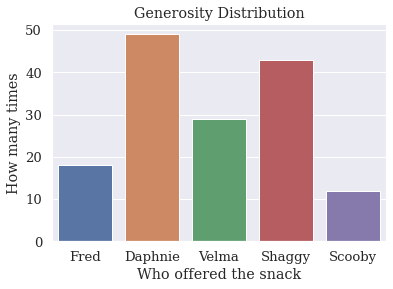

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)
plt.rcParams["font.family"] = "Serif"
ax = sns.barplot(s.index, s.values)
ax.set_title("Generosity Distribution")
ax.set_xlabel("Who offered the snack")
ax.set_ylabel("How many times")
plt.show()

In [8]:
s1 = pd.Series({"Fred": df["caught.fred"].value_counts()[True], "Daphnie": df["caught.daphnie"].value_counts()[True],
               "Velma": df["caught.velma"].value_counts()[True], "Shaggy": df["caught.shaggy"].value_counts()[True],
               "Scooby": df["caught.scooby"].value_counts()[True], "Other": df["caught.other"].value_counts()[True]})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


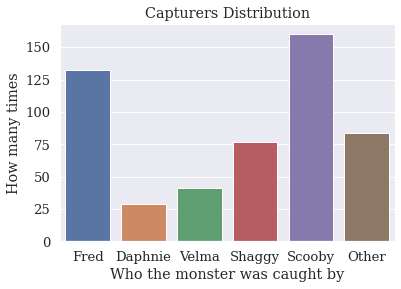

In [9]:
ax = sns.barplot(s1.index, s1.values)
ax.set_title("Capturers Distribution")
ax.set_xlabel("Who the monster was caught by")
ax.set_ylabel("How many times")
plt.show()

In [10]:
s2 = pd.Series({"Fred": df["captured.fred"].value_counts()[True], "Daphnie": df["captured.daphnie"].value_counts()[True],
               "Velma": df["captured.velma"].value_counts()[True], "Shaggy": df["captured.shaggy"].value_counts()[True],
               "Scooby": df["captured.scooby"].value_counts()[True]})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


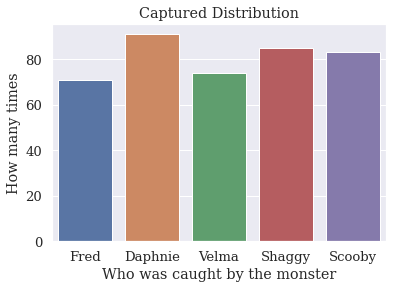

In [11]:
ax = sns.barplot(s2.index, s2.values)
ax.set_title("Captured Distribution")
ax.set_xlabel("Who was caught by the monster")
ax.set_ylabel("How many times")
plt.show()

In [12]:
s3 = pd.Series({"Fred": df["unmask.fred"].value_counts()[True], "Daphnie": df["unmask.daphnie"].value_counts()[True],
               "Velma": df["unmask.velma"].value_counts()[True], "Shaggy": df["unmask.shaggy"].value_counts()[True],
               "Scooby": df["unmask.scooby"].value_counts()[True], "Other": df["unmask.other"].value_counts()[True]})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


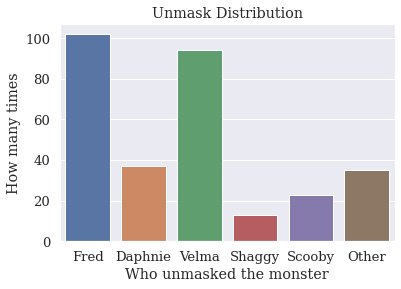

In [13]:
ax = sns.barplot(s3.index, s3.values)
ax.set_title("Unmask Distribution")
ax.set_xlabel("Who unmasked the monster")
ax.set_ylabel("How many times")
plt.show()

In [14]:
df1 = df[["monster.type", "number.of.snacks"]].copy()
df1 = df1.dropna()
df1["monster.type"] = df1["monster.type"].str.split(",")
df1 = df1.explode("monster.type")
numbers = {"1 box": 10, "a couple": 2, "several": 3, "2 boxes": 20, 
           "3 boxes": 30, "several boxes": 30, "wheel barrel full": 100, 
           "truck load": 200, "lifetime supply": 500}
mistakes = {"Disguise": "Disguised", "Possessed": "Possessed Object"}
df1["number.of.snacks"] = df1["number.of.snacks"].replace(numbers).apply(pd.to_numeric)
df1["monster.type"] = df1["monster.type"].replace(mistakes)
df2 = df1.groupby(["monster.type"], as_index=False).mean().sort_values(by=["number.of.snacks"], ascending=False)
order = df2["monster.type"].tolist()
df2

,monster.type,number.of.snacks
13,Possessed Object,15.123288
1,Animal,3.313253
14,Skeleton,3.000000
12,Plant,2.227273
7,Ghost,2.172973
16,Undead,1.927536
0,Ancient,1.878788
15,Super-Villain,1.876289
10,Mechanical,1.361111
9,Magician,1.314286


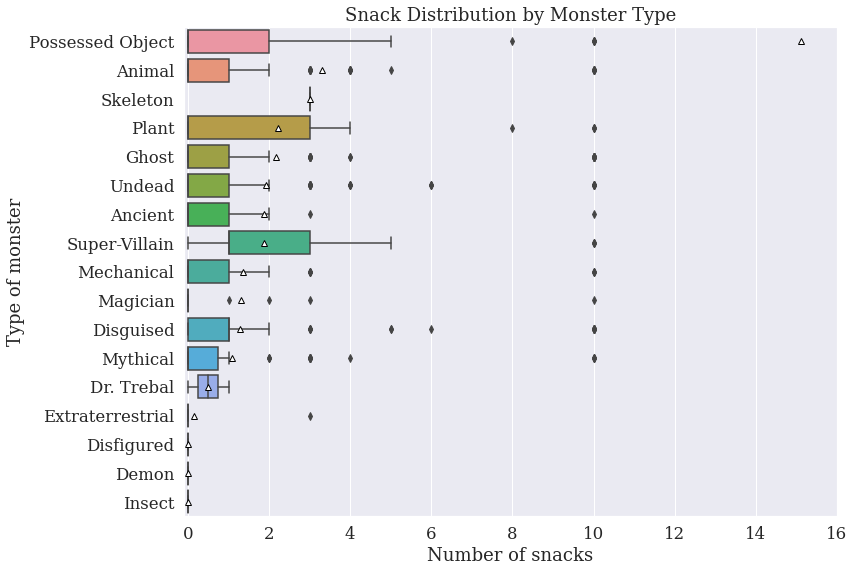

In [15]:
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(11.7, 9)})
sns.set(font_scale = 1.5)
plt.rcParams["font.family"] = "Serif"
g = sns.boxplot(x=df1["number.of.snacks"], y=df1["monster.type"], order=order, 
                showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})
g.set(xlabel="Number of snacks", ylabel="Type of monster", title="Snack Distribution by Monster Type")
g = (g.set(xlim=(-0.1,16)))
plt.show(g)

In [16]:
df3 = df[["imdb", "monster.real"]].copy()
df3 = df3.dropna()
df3

,imdb,monster.real
0,7.6,False
1,7.2,False
2,6.9,False
3,6.6,False
4,6.7,False
...,...,...
597,8.1,False
598,9.2,False
599,7.2,False
600,7.4,False


In [38]:
values = [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]

In [39]:
ratings = pd.crosstab(df3["imdb"], df3["monster.real"])
ratings

monster.real,False,True
imdb,,
4.6,0,1
4.8,0,1
4.9,0,1
5.0,0,1
5.1,1,5
5.2,0,1
5.3,0,2
5.4,0,2
5.5,0,3


In [40]:
ratings = ratings.reindex(index=values).fillna(0).astype('int')

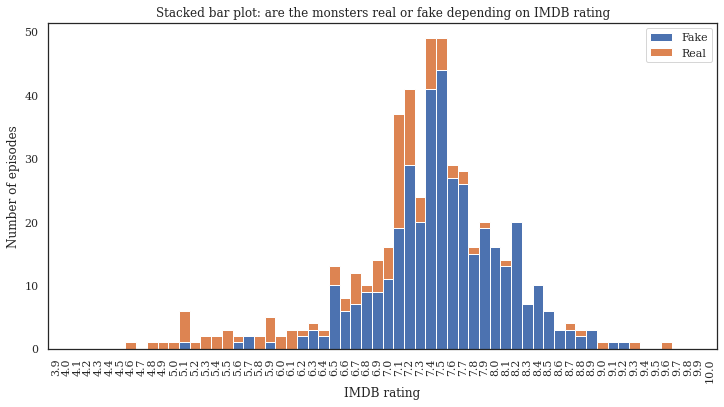

In [57]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale = 1)

sns.set_style("white")
plt.rcParams["font.family"] = "Serif"
ax = ratings.plot.bar(title="Stacked bar plot: are the monsters real or fake depending on IMDB rating", 
    xlabel="IMDB rating", ylabel="Number of episodes", width=1, stacked=True);
ax.legend(["Fake", "Real"])

plt.show()